In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

已知再净赢30局可以达到王者水平，每局胜率为60%，求最少再玩几局可以达到王者水平？

设赢x局，输y局，

则N:x+y=n,K:x-y=30,p=0.6

so x = (30+n)/2， y = (n-30)/2

# 二项式分布定义

![Image of Yaktocat](https://www.23bei.com/tool_inc/toolimg/10/928.png)

https://baike.baidu.com/item/%E4%BA%8C%E9%A1%B9%E5%88%86%E5%B8%83/1442377?fromtitle=%E4%BA%8C%E9%A1%B9%E5%BC%8F%E5%88%86%E5%B8%83&fromid=3565421

![Image of Yaktocat](https://bkimg.cdn.bcebos.com/pic/d043ad4bd11373f08202a38d78475cfbfbedab64aec2?x-bce-process=image/watermark,g_7,image_d2F0ZXIvYmFpa2UxNTA=,xp_5,yp_5)

如果p>0.5，则向右偏；如果p<0.5，则向左偏；

pdf最大也不可能是1.

## 解法1 - 构造二项式函数

In [113]:
np.math.factorial(3)

6

In [114]:
np.math.pow(2,3)

8.0

In [117]:
def binomial_(n,k,p): # pdf
    cn = np.math.factorial(n)
    # k为赢的次数，而真正赢的次数不是30，而是x
    k=int((n+k)/2)
    ck = np.math.factorial(n-k)*np.math.factorial(k)
    pk = np.math.pow(p,k)*np.math.pow((1-p),(n-k))
    result =cn/ck*pk
    return result

In [118]:
result = []
index = []
for i in range(1,100):
    result.append(binomial_(30+i,30,0.6))
    index.append(30+i)

df = pd.DataFrame({'result':result,'n':index})
df.head()

,result,n
0,0.000003,31
1,0.000002,32
2,0.000011,33
3,0.000007,34
4,0.000033,35


In [119]:
df['result'].idxmax()

98

In [120]:
df['n'][18]

49

In [121]:
index = df['result'].idxmax()
n = df['n'][index]
x = int((30+n)/2)
y = n-x
print('最少再玩{}局可以上王者,最少净赢{}局/输{}局可以上王者,'.format(n,x,y))

最少再玩129局可以上王者,最少净赢79局/输50局可以上王者,


## 解法2 - ❌

已知再净赢30局可以达到王者水平，每局胜率为60%，也就是说，净胜率 = 0.1, k = 30, 求N

由于伯努利分布的含义：一个非常简单的试验是只有两个可能结果的试验，比如正面或反面，成功或失败，有缺陷或没有缺陷，病人康复或未康复。为方便起见，记这两个可能的结果为0和1，下面的定义就是建立在这类试验基础之上的。

因此，0.9是没有含义的，因此不可以这样应用二项式分布的公式。

In [108]:
result = []
index = []
for i in range(1,100):
    result.append(binomial_(30+i,30,0.1))
    index.append(30+i)

df = pd.DataFrame({'result':result,'n':index})
df.head()

,result,n
0,2.790000e-29,31
1,4.017600e-28,32
2,3.977424e-27,33
3,3.042729e-26,34
4,1.916919e-25,35


In [109]:
index = df['result'].idxmax()
n = df['n'][index]
print('最少再玩{}局可以上王者'.format(n))

最少再玩129局可以上王者


**注意⚠️**

# 解法3 - scipy stats

## 公式学习

生成符合二项分布b(100,0.5)的随机数

In [19]:
np.random.binomial(100,0.5,100) # 100 试验次数， 0.5 事件发生概率 100 随机取出试验真实数据个数

array([51, 42, 41, 44, 43, 52, 54, 49, 49, 49, 55, 61, 43, 46, 45, 49, 53,
       49, 48, 48, 45, 50, 51, 47, 58, 56, 57, 48, 54, 62, 54, 51, 43, 52,
       56, 48, 48, 52, 47, 38, 53, 58, 51, 51, 56, 50, 51, 50, 49, 56, 59,
       45, 44, 60, 51, 51, 50, 47, 52, 56, 48, 50, 52, 51, 46, 50, 52, 48,
       48, 57, 57, 57, 49, 60, 55, 52, 49, 50, 42, 53, 62, 54, 55, 50, 51,
       56, 44, 45, 42, 52, 44, 47, 49, 44, 58, 56, 54, 60, 48, 42])

**二项分布概率质量函数**

求掷硬币（正反面概率均为0.5），100次正面朝上20次的概率。

In [20]:
stats.binom.pmf(20,100,0.5) # 20 达成目标的试验次数， 100总次数， 0.5 达成目标的概率

4.228163267601253e-10

In [21]:
stats.binom.pmf(50,100,0.5) # 20 达成目标的试验次数， 100总次数， 0.5 达成目标的概率

0.07958923738717888

**二项分布概率累计分布函数**

求掷硬币，投100次，正面朝上次数<=20次的概率

In [22]:
p = stats.binom.pmf(np.arange(0,51,1),100,0.5)
p.sum()

0.5397946186935751

In [23]:
#cdf 求解累计密度函数
stats.binom.cdf(50,100,0.5)

0.5397946186935897

In [24]:
#cdf 求解累计密度函数
stats.binom.cdf(90,100,0.5)

0.9999999999999999

In [25]:
stats.binom.cdf(30,40,0.6)

0.9844273764766717

## 例题

张三参加英语雅思考试，每次考试通过的概率为1/3，不通过的概率为2/3。如果他连续考试4次，那么恰好通过2次的概率为多少？

In [26]:
stats.binom.pmf(2,4,1/3) 

0.29629629629629634

In [32]:
for i in range(1,5):
    p = stats.binom.pmf(i,4,1/3) 
    print('考试恰巧通过{}次的概率为{}'.format(i,p))

考试恰巧通过1次的概率为0.3950617283950619
考试恰巧通过2次的概率为0.29629629629629634
考试恰巧通过3次的概率为0.09876543209876547
考试恰巧通过4次的概率为0.012345679012345675


张三参加英语雅思考试，每次考试通过的概率为1/3，不通过的概率为2/3。如果他连续考试4次，那么通过<=2次的概率为多少？

In [27]:
stats.binom.cdf(2,4,1/3)

0.888888888888889

In [34]:
for i in range(0,5):
    p = stats.binom.cdf(i,4,1/3) 
    print('考试通过<={}次的概率为{}'.format(i,p))

考试通过<=0次的概率为0.19753086419753096
考试通过<=1次的概率为0.5925925925925928
考试通过<=2次的概率为0.888888888888889
考试通过<=3次的概率为0.9876543209876544
考试通过<=4次的概率为1.0


## 应用

In [124]:
result = []
index = []
for i in range(1,100):
    n = 30+i
    k = int((30+n)/2)
    result.append(stats.binom.pmf(k,n,0.6))
    index.append(n)
    

df = pd.DataFrame({'result':result,'n':index})
df.head()

,result,n
0,0.000003,31
1,0.000002,32
2,0.000011,33
3,0.000007,34
4,0.000033,35


In [125]:
index = df['result'].idxmax()
n = df['n'][index]
x = int((30+n)/2)
y = n-x
print('最少再玩{}局可以上王者,最少净赢{}局/输{}局可以上王者,'.format(n,x,y))

最少再玩129局可以上王者,最少净赢79局/输50局可以上王者,


# 数学期望

设赢x局，输y局，共玩n局，p=0.6

0.6n - 0.4n = 30

0.2n=30

n = 150

最少再玩150局可以上王者.

# 可视化

In [118]:
from scipy import stats

In [103]:
stats.binom.pmf(20,100,0.5)

4.228163267601253e-10

# Final

In [1]:
def binomial_(n,k,p): # pdf
    cn = np.math.factorial(n)
    # k为赢的次数，而真正赢的次数不是30，而是x
    k=int((n+k)/2)
    ck = np.math.factorial(n-k)*np.math.factorial(k)
    pk = np.math.pow(p,k)*np.math.pow((1-p),(n-k))
    result =cn/ck*pk
    return result

赢(x)的概率为0.1，n = x+y, k = x-y = 30

n = 2x-30, k=30, 求x

In [4]:
index = []
prob = []
cdf = []
for i in range(0,301,1):
    _ = stats.binom.pmf(30,2*i-30,0.1)
    p2 = stats.binom.cdf(30,2*i-30,0.1)
    index.append(i)
    prob.append(_)
    cdf.append(p2)

In [5]:
Glory = pd.DataFrame({'index':index,'pmf':prob,'cdf':cdf})

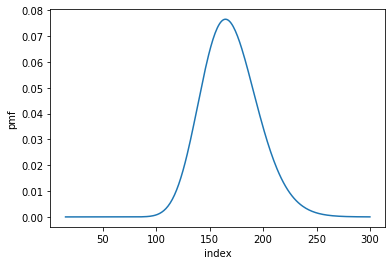

In [6]:
sns.lineplot(x='index',y='pmf',data = Glory)

In [7]:
s1 = Glory.loc[:,'pmf']
index = s1[s1 == s1.max()].index
Glory.loc[index]

,index,pmf,cdf
165,165,0.076561,0.548419
